<a href="https://colab.research.google.com/github/Sachin20010517/sca-supervised-prediction-model/blob/main/sudden_cardiac_arrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step 1: Import Libraries***

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# ***Step 2: Read Dataset***

In [2]:
sca_df = pd.read_csv('heart_disease_health_indicators_dataset.csv')
sca_df.shape

(253680, 22)

In [3]:
sca_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# ***Step 3: Dataset Overview***

## *Step 3.1: Dataset Basic Information*

In [4]:
sca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
sca_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
sca_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
print("Number of rows and columns of Training Dataset :", sca_df.shape)

Number of rows and columns of Training Dataset : (253680, 22)


In [8]:
# Define the continuous features
continuous_features = ['Age', 'BMI', 'MentHlth', 'PhysHlth', 'Education']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in sca_df.columns if feature not in continuous_features]

# Convert the identified features to object data type
sca_df[features_to_convert] = sca_df[features_to_convert].astype('object')

sca_df.dtypes

,0
HeartDiseaseorAttack,object
HighBP,object
HighChol,object
CholCheck,object
BMI,float64
Smoker,object
Stroke,object
Diabetes,object
PhysActivity,object
Fruits,object


## *Step 3.2: Summary Statistics for Numerical Variables*

In [9]:
#Check statistical values for fields with numerical datatype
sca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
MentHlth,253680.0,3.184772,7.412847,0.0,0.0,0.0,2.0,30.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.0,0.0,3.0,30.0
Age,253680.0,8.032119,3.054220,1.0,6.0,8.0,10.0,13.0
Education,253680.0,5.050434,0.985774,1.0,4.0,5.0,6.0,6.0


## *Step 3.3: Summary Statistics for Categorical Variables*

In [10]:
# Get the summary statistics for categorical variables
sca_df.describe(include='object')

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Income
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,8.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,8.0
freq,229787.0,144851.0,146089.0,244210.0,141257.0,243388.0,213703.0,191920.0,160898.0,205841.0,239424.0,241263.0,232326.0,89084.0,211005.0,141974.0,90385.0


# ***Step 4: EDA***

## *Step 4.1: Univariate Analysis*

### Step 4.1.1 | Numerical Variables Univariate Analysis

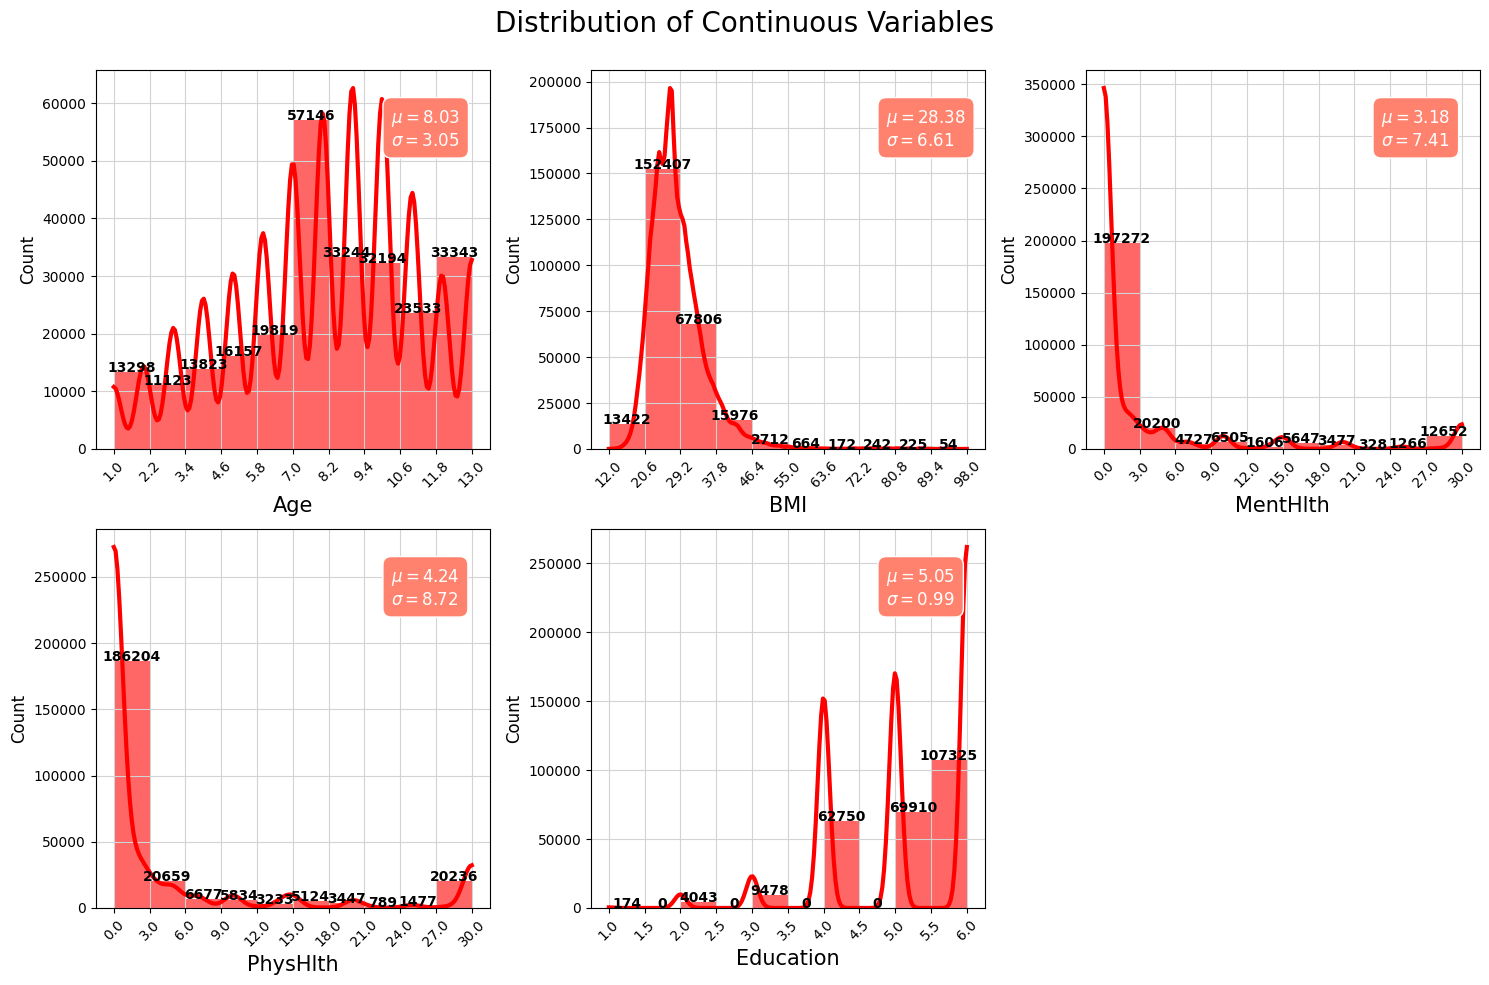

In [11]:
# Filter out continuous features for the univariate analysis
df_continuous = sca_df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### *Step 4.1.2: Categorical Variables Univariate Analysis*

In [12]:
# Filter out categorical features for the univariate analysis
categorical_features = sca_df.columns.difference(continuous_features)
df_categorical = sca_df[categorical_features]

In [13]:
# # Set the resolution of the plotted figures
# plt.rcParams['figure.dpi'] = 200

# # Configure Seaborn plot styles: Set background color and use dark grid
# sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

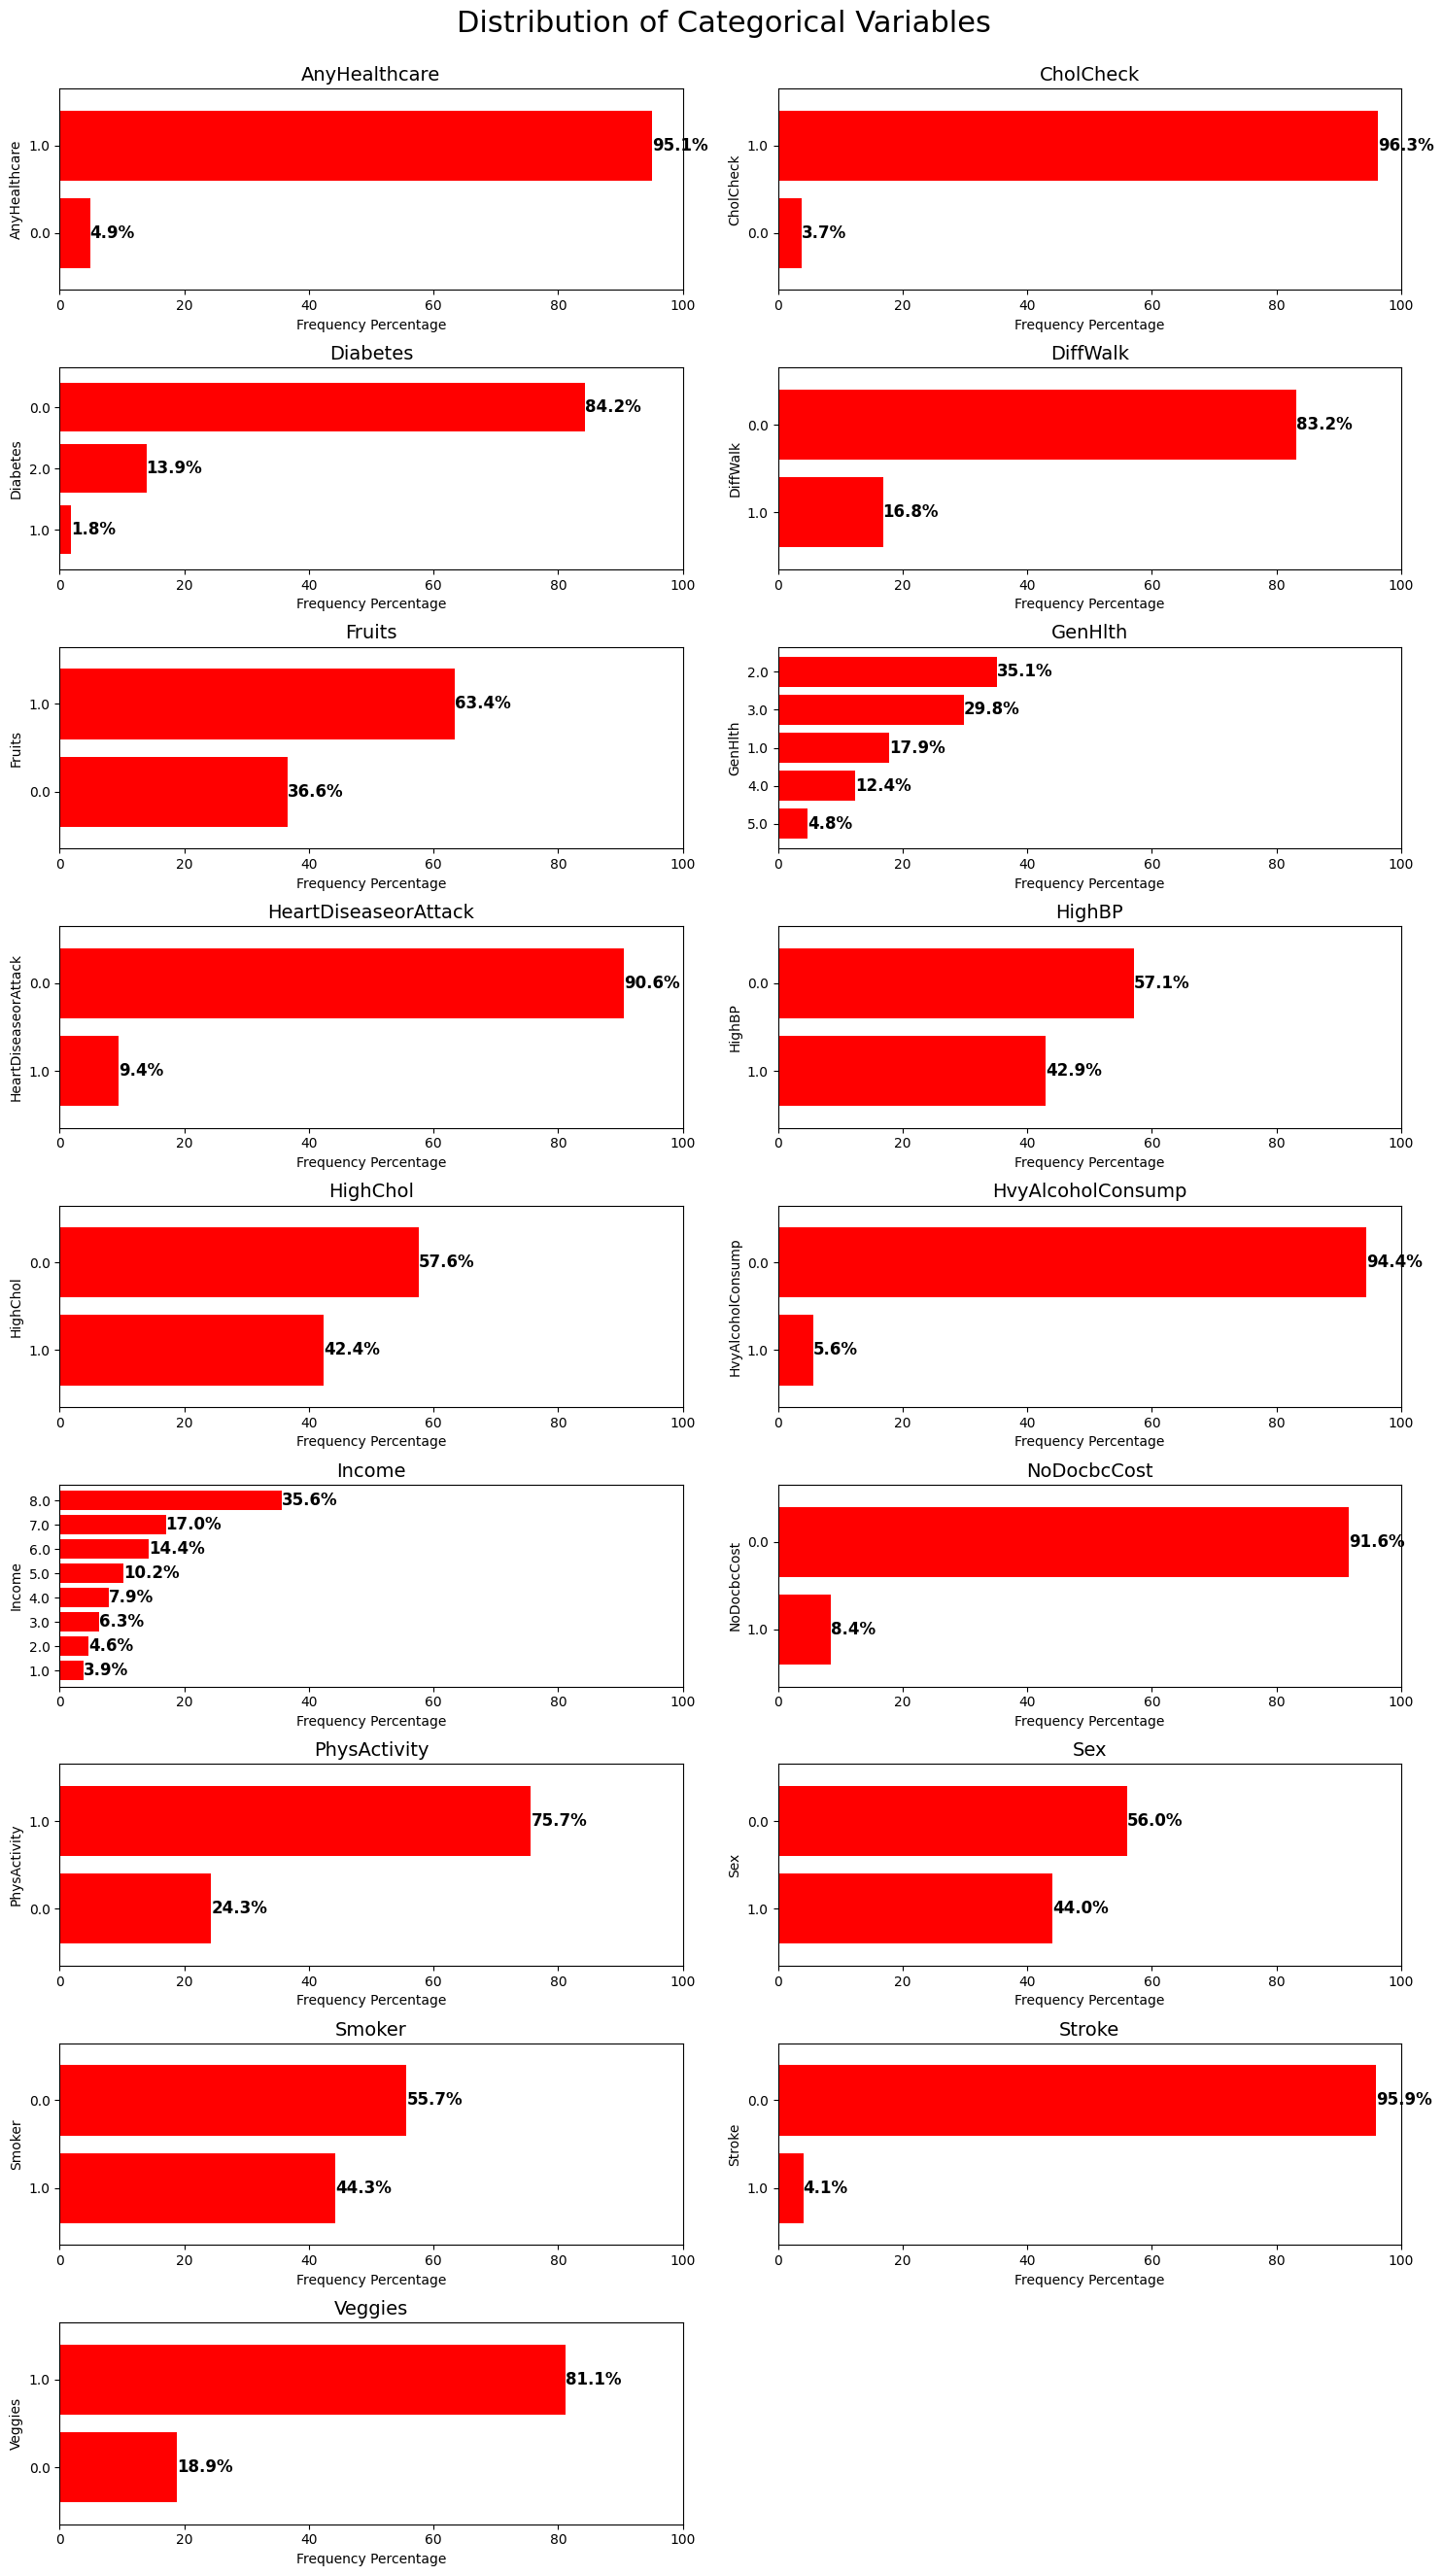

In [14]:
import math
import matplotlib.pyplot as plt

# Identify categorical features
categorical_features = sca_df.columns.difference(continuous_features)
df_categorical = sca_df[categorical_features]

# Define subplot grid size based on number of categorical features
n_features = len(categorical_features)
ncols = 2
nrows = math.ceil(n_features / ncols)

# Create subplots
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))

# Ensure ax is a 2D array
ax = np.array(ax).reshape(nrows, ncols)

# Loop through each categorical feature
for i, col in enumerate(categorical_features):
    row = i // ncols
    col_idx = i % ncols

    value_counts = sca_df[col].value_counts(normalize=True).mul(100).sort_values()
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%',
                              fontsize=12, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 100])
    ax[row, col_idx].set_xlabel('Frequency Percentage')
    ax[row, col_idx].set_title(f'{col}', fontsize=14)

# Turn off any unused axes
for i in range(n_features, nrows * ncols):
    row = i // ncols
    col_idx = i % ncols
    ax[row, col_idx].axis('off')

# Final adjustments
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


## *Step 4.2: Bivariate Analysis*

*Step 4.2.1: Numerical Features vs Target*

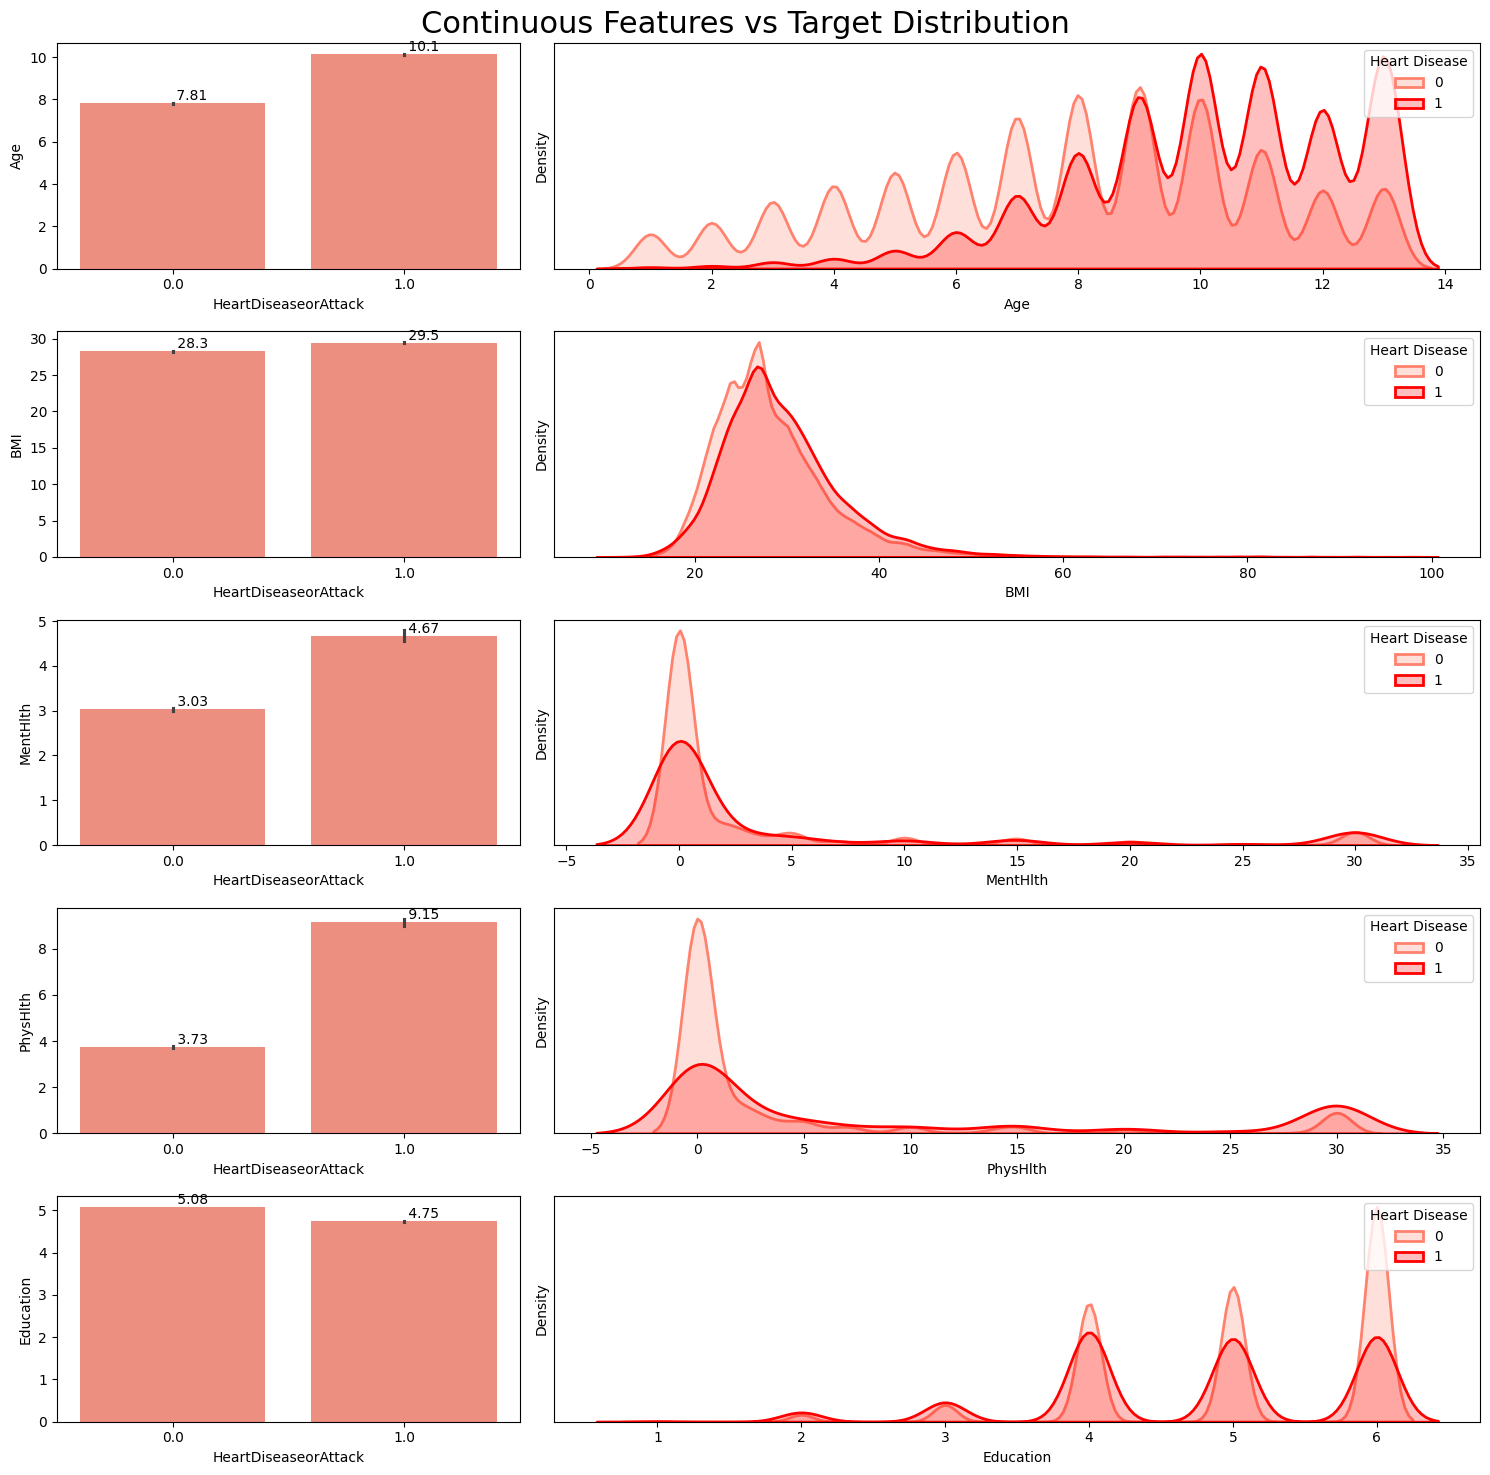

In [15]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=sca_df, x="HeartDiseaseorAttack", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=sca_df[sca_df["HeartDiseaseorAttack"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=sca_df[sca_df["HeartDiseaseorAttack"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

### Step 4.2.2: Categorical Features vs Target

In [16]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'HeartDiseaseorAttack']

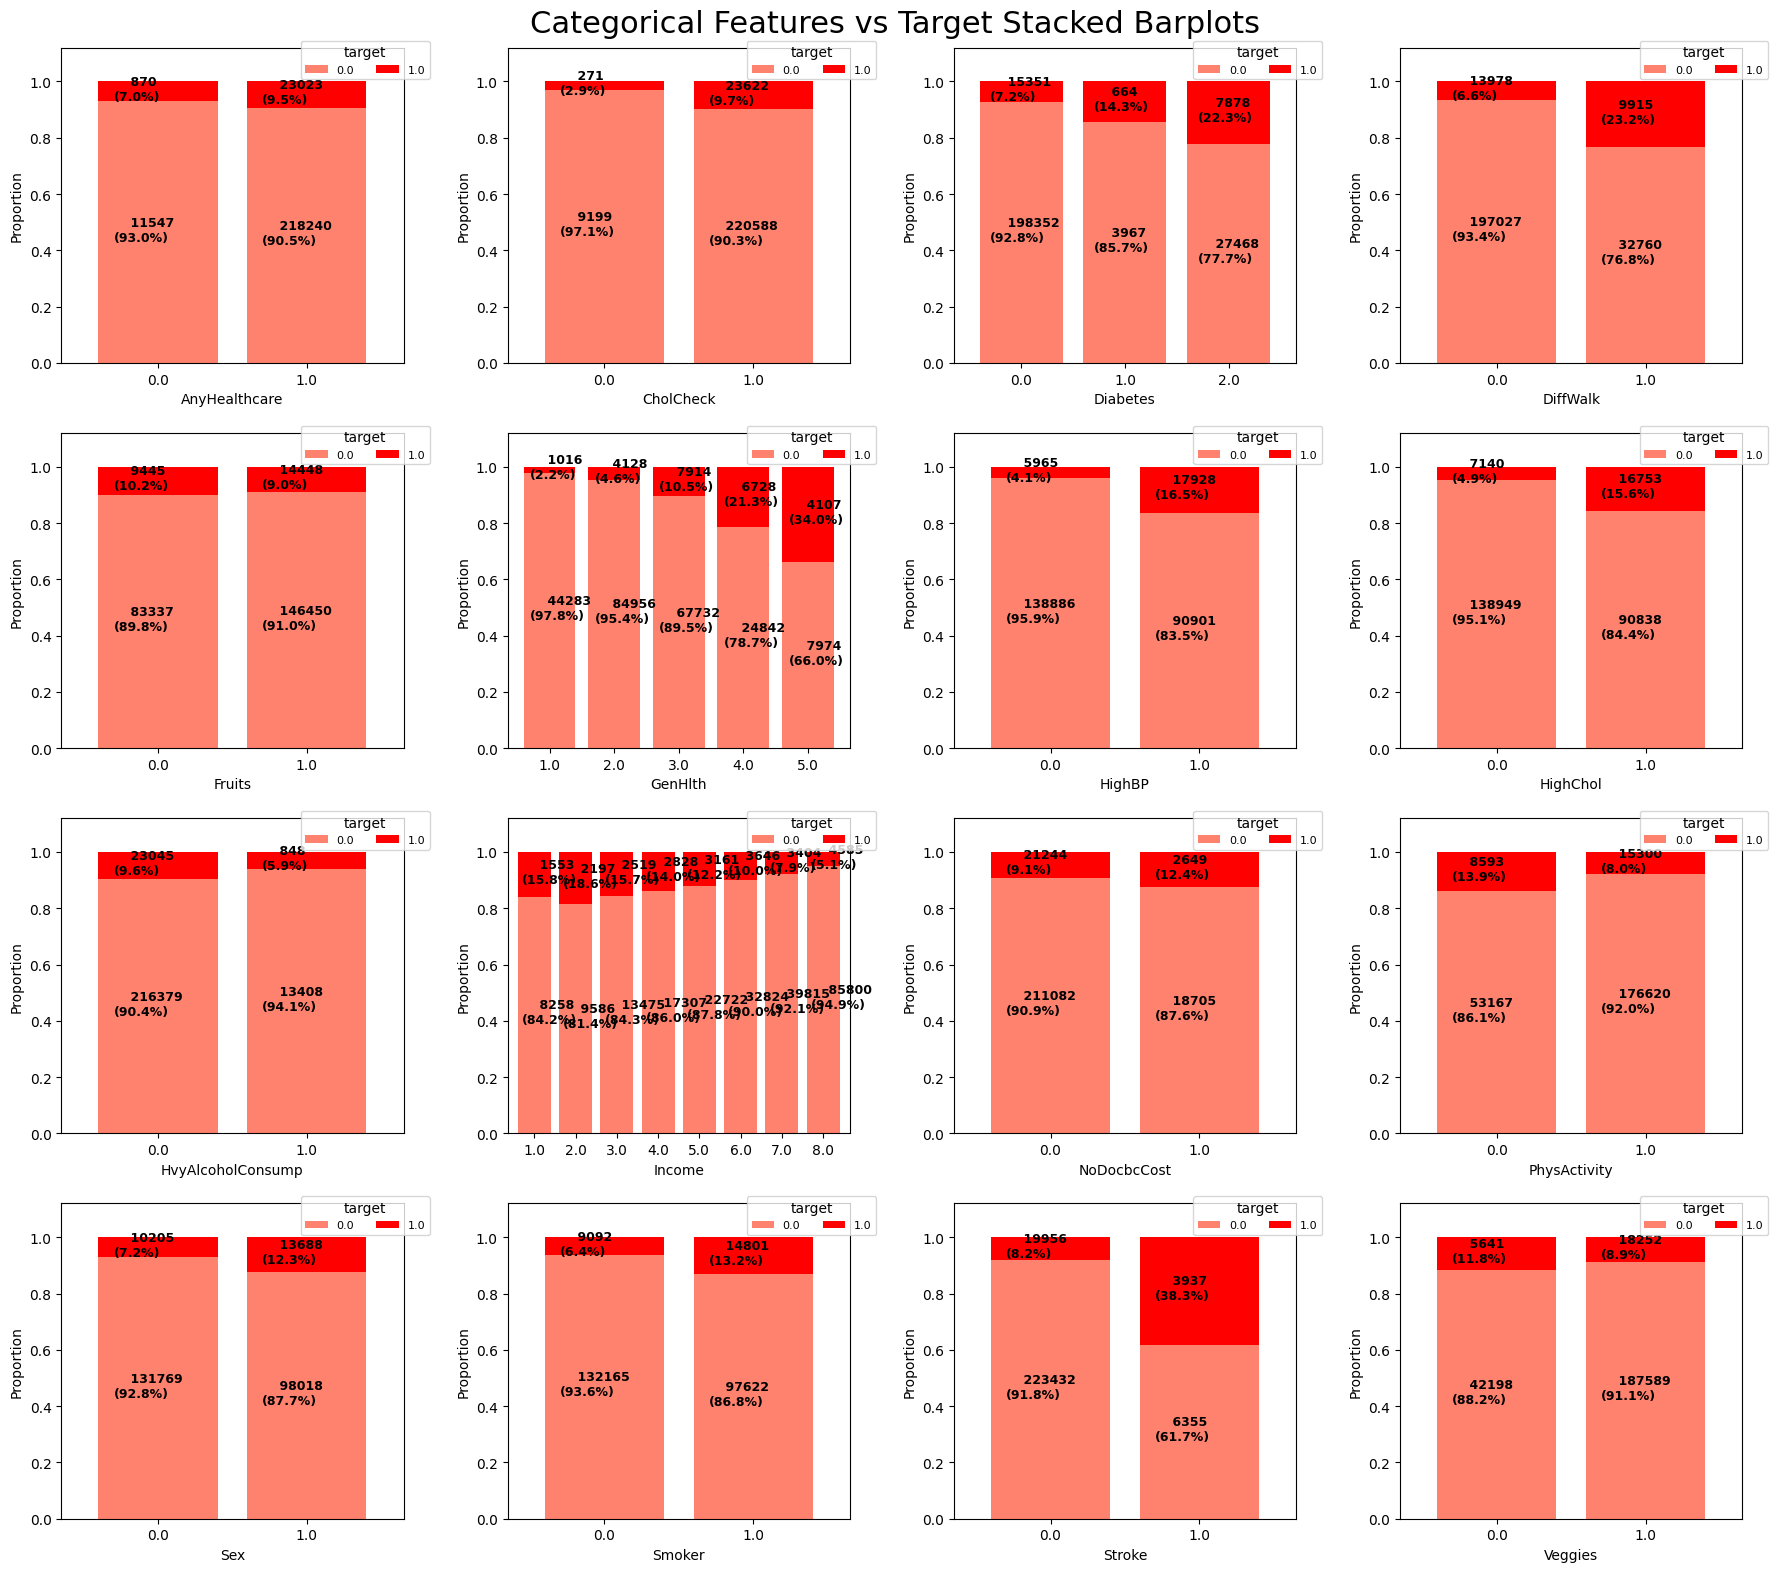

In [17]:
import math
from matplotlib.colors import ListedColormap

# Remove target column from the categorical features
categorical_features = [feature for feature in categorical_features if feature != 'HeartDiseaseorAttack']

# Dynamically calculate rows and columns
n_features = len(categorical_features)
ncols = 4
nrows = math.ceil(n_features / ncols)

# Create subplot grid
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
ax = np.array(ax).reshape(nrows, ncols)

# Loop through features
for i, col in enumerate(categorical_features):
    x, y = i // ncols, i % ncols

    cross_tab = pd.crosstab(index=sca_df[col], columns=sca_df['HeartDiseaseorAttack'])
    cross_tab_prop = pd.crosstab(index=sca_df[col], columns=sca_df['HeartDiseaseorAttack'], normalize='index')

    cmp = ListedColormap(['#ff826e', 'red'])

    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8,
                        colormap=cmp, legend=False, ylabel='Proportion')

    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],
                                                   cross_tab.loc[val],
                                                   cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                          s=f'    {count}\n({np.round(proportion * 100, 1)}%)',
                          color="black", fontsize=9, fontweight="bold")

    ax[x, y].legend(title='target', loc=(0.7, 0.9), fontsize=8, ncol=2)
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)

# Turn off unused axes
for i in range(n_features, nrows * ncols):
    row, col = i // ncols, i % ncols
    ax[row, col].axis('off')

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


# ***Step 5: Data Preprocessing***

## Step 5.1: Irrelevant Features Removal

## *Step 5.2: Missing Value Treatment*

In [18]:
# Check for missing values in the dataset
sca_df.isnull().sum().sum()

np.int64(0)

Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

## *Step 5.3: Outlier Treatment*

In [19]:
continuous_features

['Age', 'BMI', 'MentHlth', 'PhysHlth', 'Education']

In [20]:
Q1 = sca_df[continuous_features].quantile(0.25)
Q3 = sca_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((sca_df[continuous_features] < (Q1 - 1.5 * IQR)) | (sca_df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

,0
Age,0
BMI,9847
MentHlth,36208
PhysHlth,40949
Education,0
